In [6]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import normal
from scipy.stats import norm
from math import sqrt
np.random.seed(40)

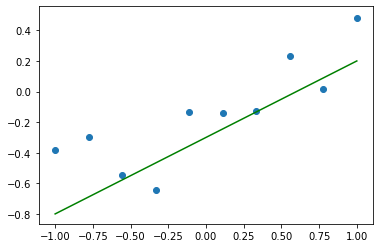

In [11]:
x = np.linspace(-1, 1, 10)
line = []
for i in x:
    i = -0.3 + 0.5 * i + normal(0, 0.4)
    line.append(i)
plt.scatter(x, line)
plt.plot(x, -0.3 + 0.5 * x, c="green")

In [12]:
def linear(x, w0, w1):
    return w0 + w1*x
    
def gaus(y, x, w0, w1):
    sd = 0.2
    constant = sqrt(np.pi * 2) * sd
    return constant * np.exp(-0.5 * ((y - linear(x, w0, w1))/sd) ** 2)

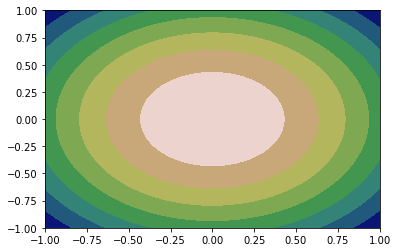

In [53]:
w0, w1 = np.meshgrid(np.linspace(-1, 1, 50), np.linspace(-1, 1, 50))
g0 = norm.pdf(w0, 0, sqrt(2))
g1 = norm.pdf(w1, 0, sqrt(2))
prior = g0 * g1
plt.contourf(w0, w1, prior, cmap="gist_earth")

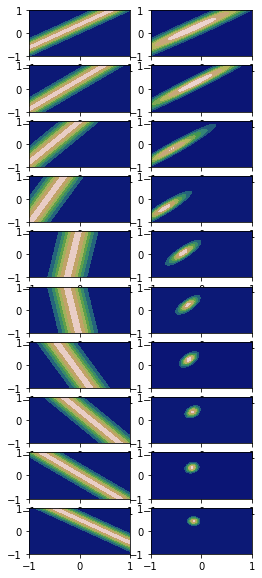

In [54]:
fig, axs = plt.subplots(10, 2, figsize=(4, 10))
c = 0
for i, j in zip(x, line):
    maxlikelihood = gaus(j, i, w0, w1)
    post = prior * maxlikelihood
    prior = post
    axs[c, 0].contourf(w0, w1, maxlikelihood, cmap="gist_earth")
    axs[c, 1].contourf(w0, w1, post, cmap="gist_earth")
    c= c+ 1